## Desafío - Dimensionalidad y agrupación (I)
- Karen Cortés
- Constanza Córdova

### Desafio 1: Lectura de archivos
- importe las librerías necesarias para el análisis factorial siguiendo las convenciones
- Importe la base de datos bfi.csv y asígnela a un objeto df.
- Solicite las primeras 5 observaciones con head.

Se importan las librerias que se utilizaran para el siguiente análisis:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')
import statsmodels.api as sn
import statsmodels.formula.api as snf

import factor_analyzer as factor
import missingno as msgn

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

Se importan las bases dedatos asignada al objeto df y solicitamos las primeras 5 observaciones

In [2]:
df = pd.read_csv('bfi.csv')
df.head(5)

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


### Desafio 2: Procesamiento
- Elimine las columnas redundantes de la base, tal como 'Unnamed: 0'.
- Analice el patrón de datos perdidos con missingno. Comente cuáles son las principales variables con mayores tasas de valores perdidos.
- Genere un nuevo objeto donde almacenará la base sin valores perdidos.


Se elimina la columna Unnamed:0 y se consulta la cantidad de observaciones y registros del data frame

In [3]:
df = df.drop('Unnamed: 0', axis = 1)
df.shape

(2800, 28)

Se analizan los datos perdidos mediante missingno. De acuerdo a la matriz obtenida se observa gráficamente que las principal variable con datos perdidos es education 

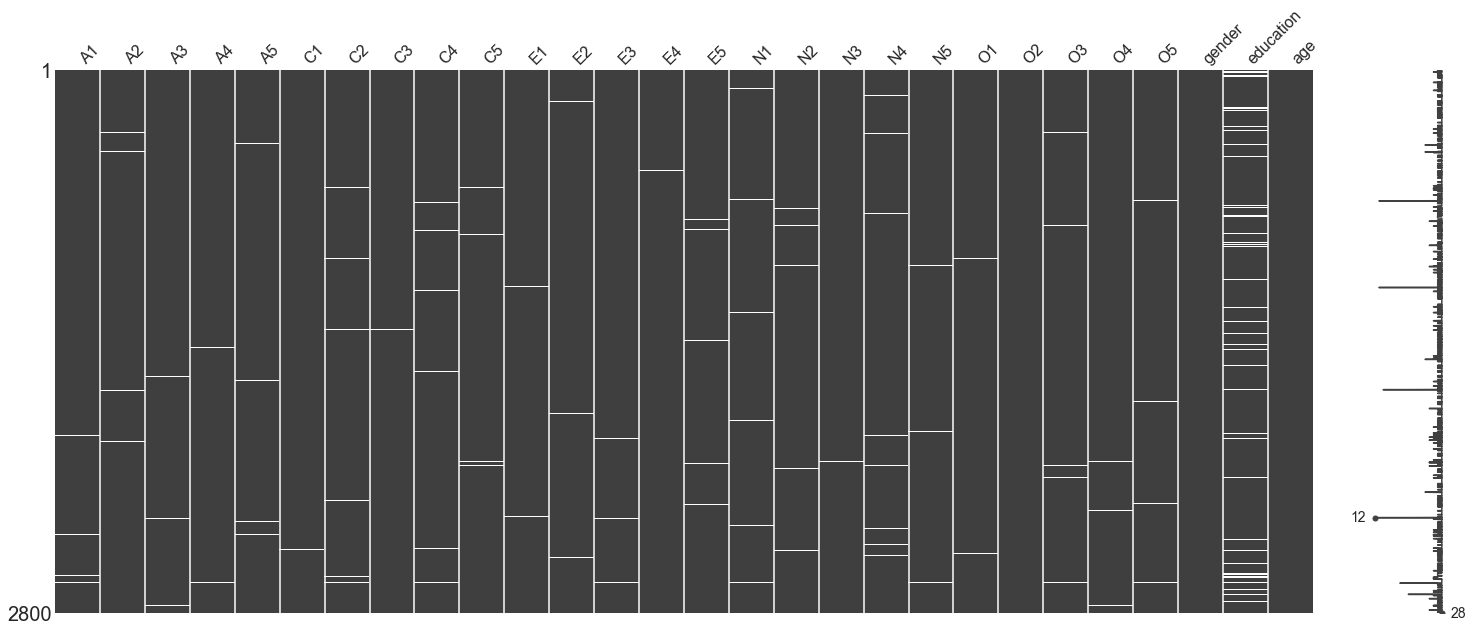

In [4]:
msgn.matrix(df)

Generamos nuevo objeto sin valores perdidos. Adicionalmente se consulta la cantidad de observaciones que contiene el nuevo data frame

In [5]:
new_df = df.dropna()
new_df.shape

(2236, 28)

In [6]:
print(f'Se eliminaron {df.shape[0] - new_df.shape[0]} observaciones que contienen datos perdidos')


Se eliminaron 564 observaciones que contienen datos perdidos


### Desafio 3 - Descripción
- Separe en un nuevo objeto DataFrame la batería de preguntas a extraer.
- Reporte las medias para cada una de las preguntas de la batería. Esto lo puede lograr con un dotplot.
- Genere una matriz de correlaciones con este nuevo objeto. Visualízalo con heatmap.
Comente sobre los principales patrones de correlación entre las preguntas de la
batería.


Se crean dos nuevos objetos, un set de la bateria de preguntas y otro set de las covariables sobre las características demográficas de los encuestados:

In [28]:
set_preguntas = new_df.loc[:,'A1':'O5'].reset_index().drop(['index'], axis=1)
set_covariables = new_df.loc[:, 'gender': 'age'].reset_index().drop(['index'], axis=1)
set_preguntas.sample()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
1827,4.0,4.0,6.0,6.0,5.0,6.0,4.0,4.0,4.0,6.0,...,1.0,2.0,3.0,6.0,2.0,2.0,3,3.0,5.0,5.0


Reportamos las medias para cada una de las prefuntas de la bateria como se observa en el siguiente gráfico:

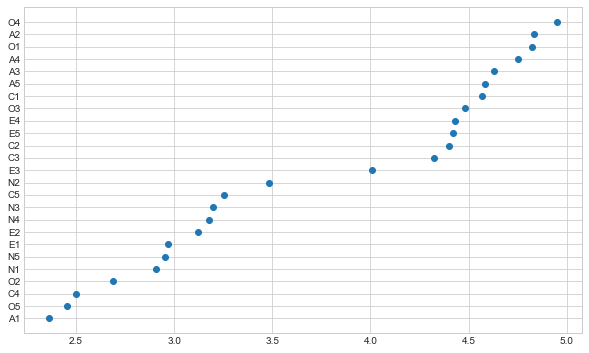

In [29]:
variable, mean = [], []
for colname, serie in set_preguntas.iteritems():
   
    variable.append(colname)
    
    mean.append(serie.mean())
    
tmp_df = pd.DataFrame({'var':variable, 'mean': mean}).sort_values(by=['mean'])

plt.plot(tmp_df['mean'], tmp_df['var'],'o')

Del gráfico anterior observamos que la pregunta con mayor puntuación promedio fue O4 que corresponde a la pregunta "Dedido tiempo a la reflexión de las cosas", posteriormente le siguen A2: " Me preocupo del bienestar de otros" y O1: "Estoy lleno de ideas". En cambio, se observa que las preguntas con menor puntuación promedio son A1: "Soy indiferente a los sentimientos de otros", O5: "No profundizaré sobre una materia específica" y C4: "Hago cosas con el mínimo esfuerzo".

Generamos mapa de calor de las correlaciones del set de preguntas:

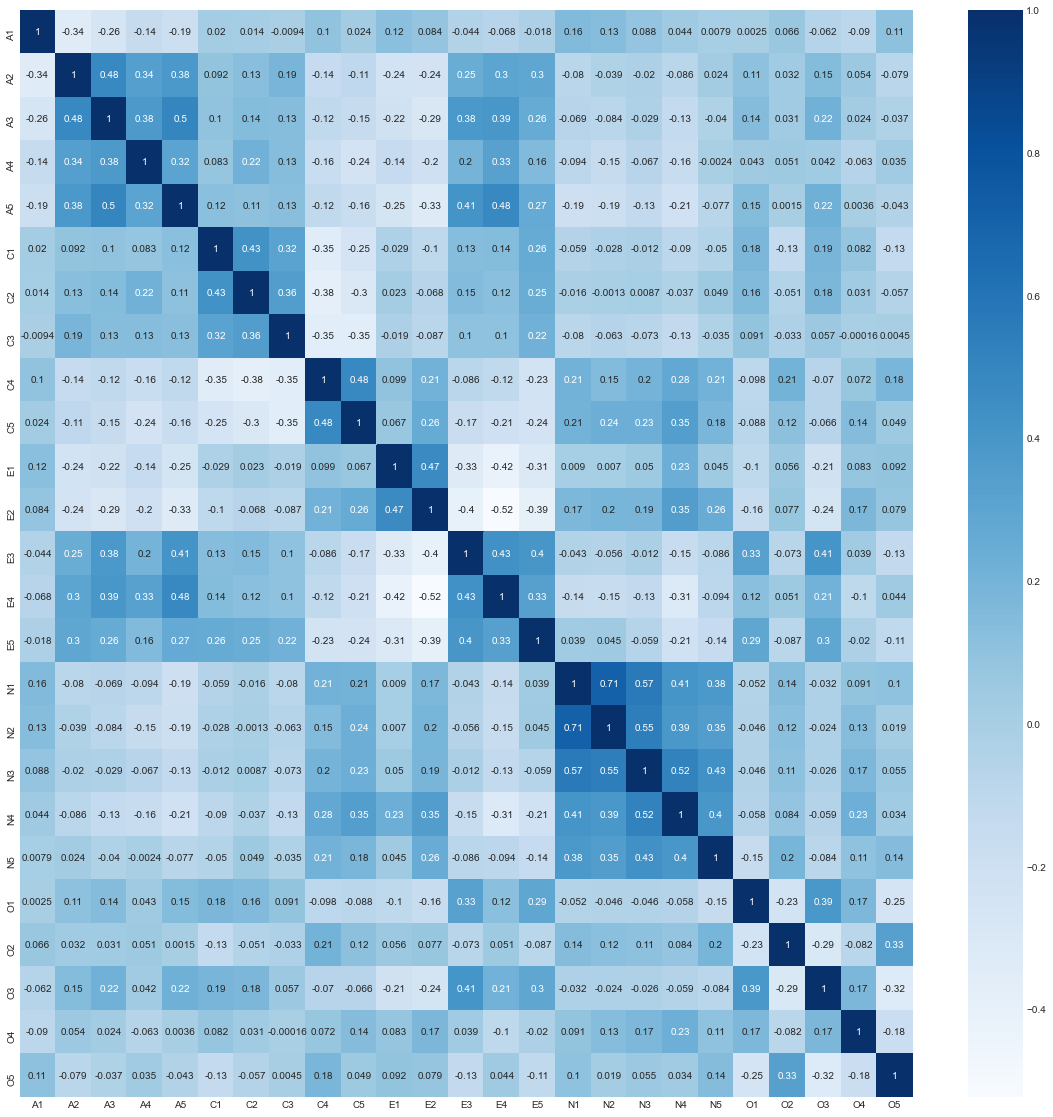

In [9]:
plt.figure(figsize=(20, 20))
sns.heatmap(set_preguntas.corr(), cmap='Blues', annot=True)

Del mapa de calor se observa los siguiente:
- Las preguntas correspondientes al grupo A tienen una fuerte correlación entre ellas. La pregunta A1 tiene una correlación negativa en esta agrpación, lo cual tiene sentido debido a que la pregunta hace referencia a "soy indiferente a los sentimientos de otros"
- Las preguntas correspondientes al grupo C tienen una fuerte correlación entre ellas. En este caso las preguntas C4 y C5 tienen una correlación negativa
- Las preguntas correspondientes al grupo E tambienten tienen correlación entre ellas. Se observa correlación negativa para E1 y E2
- Las preguntas correspondientes al grupo N están fuertemente correlacionadas y todas con correlación positiva
- Las preguntas correspondientes al grupo O existe mayor diversidad en la correlación. 

### Desafio 4 - Extracción de factores
- Antes de iniciar la extracción de factores, inspeccione la idoneidad de la batería de preguntas para realizar un análisis factorial mediante la prueba de esfericidad de Barlett y Kaiser-Meyer-Olkin. Comente los resultados.
- Instancie un objeto con FactorAnalyzer() donde se estimen 10 dimensiones latentes y no se aplique rotación.
- Genere un scree plot entre los eigenvalues del modelo y la cantidad de dimensiones estimables.
- Refactoriza el objeto con FactorAnalyzer() para incluir la cantidad de dimensiones válidas que informó el scree plot.
- Extraiga las cargas λ del modelo e identifique qué ítems están asociados a cada factor. Comente sobre qué significa cada factor construído.


#### Prueba de esfericidad de Barlett
- Hipotesis nula: La matriz de correlaciones es una matriz de identidad
- Hipótesis Alternativa: La matriz de correlaciones no es una matriz de identidad

In [10]:
factor.calculate_bartlett_sphericity(set_preguntas)

(16509.673550497206, 0.0)

Observamos que el segundo argumento de la prueba de Barlett es menor a .05, por lo que existe evidencia para rechazar la hipotesis nula, por lo que existe por lo menos algún grado de covarianza entre los items

#### Prueba de Kaiser-Meyer-Olkin

In [11]:
factor.calculate_kmo(set_preguntas)

(array([0.73783211, 0.83426339, 0.87158082, 0.87042369, 0.90061871,
        0.83810325, 0.78841959, 0.84946345, 0.82364592, 0.86188771,
        0.84151427, 0.88389524, 0.89307072, 0.87818653, 0.89404239,
        0.7781268 , 0.77845262, 0.86005895, 0.88625489, 0.86049617,
        0.85501182, 0.78381059, 0.83374388, 0.78111794, 0.75804877]),
 0.8468295031833752)

Observamos que para todos los casos KMO > 0.7 por lo que el nivel de multicolinealidad entre las variables es aceptable

Se genera un modelo con 10 dimensiones y sin rotación:

In [12]:
factorize = factor.FactorAnalyzer(n_factors=10, rotation= None).fit(set_preguntas)

Text(0.5, 1.0, 'Scree plot')

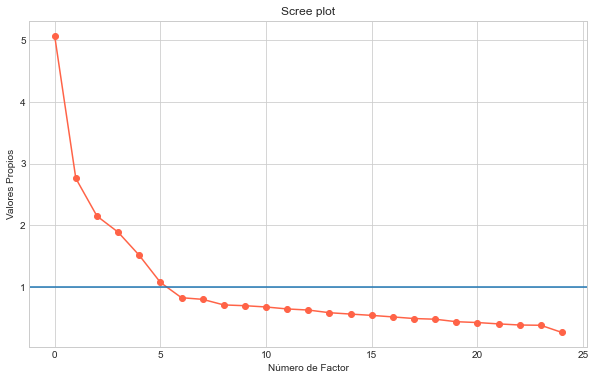

In [13]:
factor_screenplot = factorize.get_eigenvalues()[0]

plt.plot(factor_screenplot, 'o-', color = 'tomato')
plt.xlabel('Número de Factor')
plt.ylabel('Valores Propios')
plt.axhline(1)
plt.title("Scree plot")

De acuerdo al Scree plot se observa que para los valores propios existen 6 factores mayores a 1. Por lo que refactorizamos con 6 dimensiones para luego extraer las cargas lambda del modelo

In [14]:
factorize_2 = factor.FactorAnalyzer(n_factors= 6, rotation= None).fit(set_preguntas)

In [15]:
factor_loadings = factorize_2.loadings_
factor_loadings = pd.DataFrame(factor_loadings, set_preguntas.columns, columns=['F1', 'F2', 'F3', 'F4', 'F5', 'F6'])
factor_loadings

,F1,F2,F3,F4,F5,F6
A1,-0.217818,-0.025323,0.147212,0.036770,-0.420779,0.294572
A2,0.455915,0.295148,-0.197899,0.120086,0.344092,-0.184539
A3,0.522146,0.305260,-0.253026,0.088980,0.273546,0.015334
A4,0.399122,0.119116,-0.152263,0.264628,0.162489,0.025393
A5,0.567112,0.183979,-0.262259,0.027891,0.166290,0.130115
C1,0.327575,0.121791,0.438554,0.147945,0.003235,0.104954
C2,0.325170,0.181309,0.454576,0.318084,0.059215,0.170916
C3,0.322018,0.046434,0.319860,0.329100,0.038197,0.037755
C4,-0.472113,0.126126,-0.451212,-0.264980,0.011658,0.264059
C5,-0.485339,0.149672,-0.261761,-0.296567,0.098866,0.052008


Excluímos las cargas menores a 0.4 y así simplificar la estructura

In [16]:
factor_loadings.applymap( lambda x: np.where( x<.4, '', round(x,2)))

,F1,F2,F3,F4,F5,F6
A1,,,,,,
A2,0.46,,,,,
A3,0.52,,,,,
A4,,,,,,
A5,0.57,,,,,
C1,,,0.44,,,
C2,,,0.45,,,
C3,,,,,,
C4,,,,,,
C5,,,,,,


Observamos que el Factor 1 presenta cargas altas asociadas para las preguntas A2, A3, A4, A5, E3, E4, E5 y O3. El Factor 2 pesenta cargas altas para N1,N2,N3,N4 y N5. El Factor 3 presenta cargas altas para C1 y C2, mientras que el Factor 4 presenta carga alta sólo para O5. El factor 6 no presenta carga alta.
De lo anterior, se realizará una refactorización para 5 dimensiones y para simplificar la interpretación de los factores utilizaremos el método de rotación facotrial Varimax

In [70]:
factorize_3 = factor.FactorAnalyzer(n_factors= 5, rotation= 'varimax').fit(set_preguntas)
factor_loadings_3 = factorize_3.loadings_
factor_loadings_3 = pd.DataFrame(factor_loadings_3, set_preguntas.columns, columns=['F1', 'F2' , 'F3', 'F4', 'F5'])
factor_loadings_3.applymap( lambda x: np.where( x <.4 , '', round(x,2)))

,F1,F2,F3,F4,F5
A1,,,,,
A2,,,,0.61,
A3,,,,0.64,
A4,,,,0.43,
A5,,,,0.53,
C1,,,0.54,,
C2,,,0.64,,
C3,,,0.56,,
C4,,,,,
C5,,,,,


Para facilitar el análisis, adicionalmente realizamos un mapa de calor de las cargas

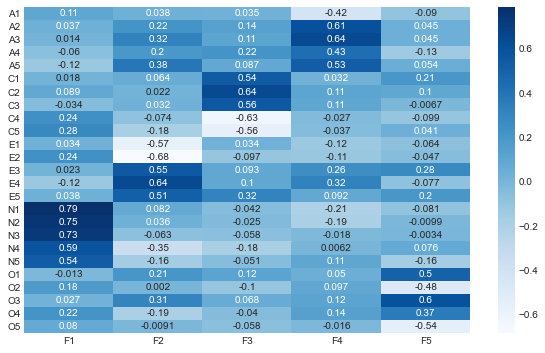

In [72]:
sns.heatmap(factor_loadings_3, cmap='Blues', annot=True)

De lo anterior observamos lo siguiente:
- El Factor 1 presenta cargas altas con el grupo de preguntas 'N' asociadas a las preguntas relacionadas con Neuroticismo
- El Factor 2 presenta cargas altas con el grupo de preguntas 'E' asociadas a las preguntas relacionadas con Extroversión
- El Factor 3 presenta cargas altas con el grupo de preguntas 'C' asociadas a las preguntas relacionadas con Escrupulosidad
- El Factor 4 presenta cargas altas con el grupo de preguntas 'A' asociadas a las preguntas relacionadas con Amabilidad
- El Factor 5 presenta cargas alras con el grupo de preguntas 'O' asociadas a las preguntas relacionadas con Apertura

In [71]:
loadings_ss, proporcion_var, var_acum = factorize_3.get_factor_variance()
print(f'Los 5 factores capturan el {int(var_acum[4].round(2)*100)}% de la varianza')

Los 5 factores capturan el 42% de la varianza


### Desafio 5: Modelación de factores
- Extraiga los puntajes del modelo factorial a su base de datos.
- Grafique la densidad de cada uno con kdplot.
- Modele y comente brevemente sobre cuáles son los principales determinantes de cada factor en base al  modelo estimable


Extraemos los puntajes del modelo factorial:

In [31]:
factores_score = pd.DataFrame(factorize_3.transform(set_preguntas), columns=['F1', 'F2' , 'F3', 'F4', 'F5'])
factores_score

,F1,F2,F3,F4,F5
0,0.241795,1.090388,1.289563,-0.143249,0.263421
1,0.386986,-1.303600,-0.788692,-1.919132,-0.404143
2,-0.155849,0.272835,-0.219292,-0.102257,-0.336266
3,-0.434364,0.023121,0.709011,-1.698283,-0.261523
4,-1.014068,0.214634,-1.672834,0.750211,0.418495
...,...,...,...,...,...
2231,1.104175,1.077716,-0.166852,-0.052568,-0.933378
2232,1.328155,-1.173799,-0.146970,-1.209395,0.411348
2233,-0.199179,0.736597,0.777602,-1.117351,0.922451
2234,0.949564,0.720292,0.036974,-2.150129,0.654865


Graficamos la densidad de cada factor

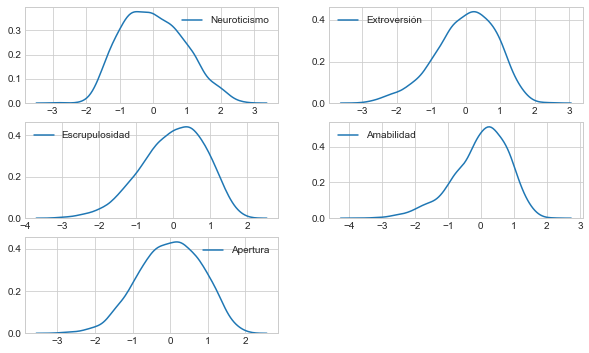

In [74]:
plt.subplot(3,2,1)
sns.kdeplot(factores_score['F1'], label = 'Neuroticismo')
plt.subplot(3,2,2)
sns.kdeplot(factores_score['F2'], label = 'Extroversión' )
plt.subplot(3,2,3)
sns.kdeplot(factores_score['F3'], label = 'Escrupulosidad' )
plt.subplot(3,2,4)
sns.kdeplot(factores_score['F4'], label = 'Amabilidad' )
plt.subplot(3,2,5)
sns.kdeplot(factores_score['F5'], label = 'Apertura' )

Realizamos el modelo de los factores y covariables demográficas:
- En primer lugar transformamos la variable genero en binaria con valor 1 para mujer y 0 para hombre

In [114]:
modelo_factores = set_covariables.copy()
modelo_factores['mujer'] = np.where(modelo_factores['gender'] == 2, 1,0)
modelo_factores

,gender,education,age,mujer
0,2,3.0,21,1
1,1,2.0,19,0
2,1,1.0,21,0
3,1,1.0,17,0
4,1,5.0,68,0
...,...,...,...,...
2231,2,3.0,22,1
2232,2,4.0,24,1
2233,2,4.0,29,1
2234,1,4.0,31,0


Luego incorporamos al modelo los factores estimados anteriormente

In [115]:
for i in ['F1', 'F2' , 'F3', 'F4', 'F5']:
    modelo_factores[i] = factores_score[i]
    
modelo_factores

,gender,education,age,mujer,F1,F2,F3,F4,F5
0,2,3.0,21,1,0.241795,1.090388,1.289563,-0.143249,0.263421
1,1,2.0,19,0,0.386986,-1.303600,-0.788692,-1.919132,-0.404143
2,1,1.0,21,0,-0.155849,0.272835,-0.219292,-0.102257,-0.336266
3,1,1.0,17,0,-0.434364,0.023121,0.709011,-1.698283,-0.261523
4,1,5.0,68,0,-1.014068,0.214634,-1.672834,0.750211,0.418495
...,...,...,...,...,...,...,...,...,...
2231,2,3.0,22,1,1.104175,1.077716,-0.166852,-0.052568,-0.933378
2232,2,4.0,24,1,1.328155,-1.173799,-0.146970,-1.209395,0.411348
2233,2,4.0,29,1,-0.199179,0.736597,0.777602,-1.117351,0.922451
2234,1,4.0,31,0,0.949564,0.720292,0.036974,-2.150129,0.654865


#### Modelo neuroticismo F1

In [116]:
modelo_neuroticismo = snf.ols('F1 ~ mujer + education  + age', modelo_factores).fit()
modelo_neuroticismo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     F1   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     17.57
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           2.82e-11
Time:                        16:44:12   Log-Likelihood:                -2969.1
No. Observations:                2236   AIC:                             5946.
Df Residuals:                    2232   BIC:                             5969.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1426      0.076      1.877      0.061      -0.006       0.292
mujer          0.2220      0.041      5.392      0.000       0.141       0.303
education     -0.0079      0.018     -0.441      0.659      -0.043       0.027
age           -0.0090      0.002     -4.818      0.000      -0.013      -0.005
==============================================================================
Omnibus:                       67.977   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.633
Skew:                           0.280   Prob(JB):                     6.14e-12
Kurtosis:                       2.510   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Del modelo para el factor 1, Neuroticismo, los principales factores son la edad y el sexo. Vemos que el factor educación no es estadisticamente significativo con p-val = 0.659

#### Modelo Extroversión F2

In [120]:
modelo_extroversion = snf.ols('F2 ~ mujer + education + age', modelo_factores).fit()
modelo_extroversion.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     F2   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     7.591
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           4.75e-05
Time:                        16:48:15   Log-Likelihood:                -2867.2
No. Observations:                2236   AIC:                             5742.
Df Residuals:                    2232   BIC:                             5765.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0950      0.073     -1.308      0.191      -0.237       0.047
mujer          0.1764      0.039      4.483      0.000       0.099       0.254
education     -0.0234      0.017     -1.362      0.173      -0.057       0.010
age            0.0017      0.002      0.968      0.333      -0.002       0.005
==============================================================================
Omnibus:                       64.892   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.195
Skew:                          -0.433   Prob(JB):                     5.72e-16
Kurtosis:                       2.944   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Del modelo para el factor 2, Extroversión, el principal factor es el sexo. Vemos que el factor educación y edad no son estadisticamente significativos con p-val = 0.173 y 0.333 respectivamente

#### Modelo Escrupulosidad F3

In [121]:
modelo_escrupulosidad = snf.ols('F3 ~ mujer + education + age', modelo_factores).fit()
modelo_escrupulosidad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     F3   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     9.331
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           3.95e-06
Time:                        16:48:58   Log-Likelihood:                -2823.1
No. Observations:                2236   AIC:                             5654.
Df Residuals:                    2232   BIC:                             5677.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2641      0.071     -3.710      0.000      -0.404      -0.125
mujer          0.1467      0.039      3.802      0.000       0.071       0.222
education     -0.0038      0.017     -0.229      0.819      -0.037       0.029
age            0.0060      0.002      3.435      0.001       0.003       0.009
==============================================================================
Omnibus:                       71.253   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.720
Skew:                          -0.456   Prob(JB):                     1.33e-17
Kurtosis:                       2.960   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Del modelo para el factor 3, Escrupulosidad, los principales factores son el sexo y edad. Vemos que el factor educación no es estadisticamente significativo con p-val = 0.819

#### Modelo Amabilidad F4

In [123]:
modelo_amabilidad = snf.ols('F4 ~ mujer + education + age', modelo_factores).fit()
modelo_amabilidad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     F4   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     38.53
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           2.86e-24
Time:                        16:51:08   Log-Likelihood:                -2723.1
No. Observations:                2236   AIC:                             5454.
Df Residuals:                    2232   BIC:                             5477.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4448      0.068     -6.534      0.000      -0.578      -0.311
mujer          0.3661      0.037      9.923      0.000       0.294       0.438
education      0.0104      0.016      0.644      0.520      -0.021       0.042
age            0.0056      0.002      3.352      0.001       0.002       0.009
==============================================================================
Omnibus:                      157.288   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.108
Skew:                          -0.661   Prob(JB):                     7.08e-43
Kurtosis:                       3.580   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Del modelo para el factor 4, Amabilidad, los principales factores son el sexo y edad. Vemos que el factor educación no es estadisticamente significativo con p-val = 0.520

#### Modelo Apertura F5

In [124]:
modelo_apertura = snf.ols('F5 ~ mujer + education + age', modelo_factores).fit()
modelo_apertura.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     F5   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     25.10
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           5.70e-16
Time:                        16:52:03   Log-Likelihood:                -2721.1
No. Observations:                2236   AIC:                             5450.
Df Residuals:                    2232   BIC:                             5473.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2263      0.068     -3.328      0.001      -0.360      -0.093
mujer         -0.2176      0.037     -5.904      0.000      -0.290      -0.145
education      0.0900      0.016      5.602      0.000       0.059       0.122
age            0.0029      0.002      1.720      0.086      -0.000       0.006
==============================================================================
Omnibus:                       31.431   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.261
Skew:                          -0.253   Prob(JB):                     2.69e-07
Kurtosis:                       2.738   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Del modelo para el factor 5, Apertura, los principales factores son el sexo y educación. Vemos que el factor edad no es estadisticamente significativo con p-val = 0.086